## Full model cross-lingual representation similarity

Similarity of full vs full model one language:
- take finetuned model representation of english, full model representation of english
- over layers, compute CKA scores
- do this for a english and other language pairs

In [1]:
%load_ext autoreload
%autoreload 2

# Change working directory to root of the repo
import os

os.getcwd()
os.chdir("..")
os.getcwd()

'/home/paulius/personal/pycharm-projects/cross-lingual-subnetworks'

In [3]:
from cross_lingual_subnets.visualization import load_encodings

PATH_TO_ENCODINGS = "encodings/encodings/"
full_sub = load_encodings(PATH_TO_ENCODINGS, max_length=50)

In [4]:
import matplotlib.pyplot as plt

font_config = {"size": 14}
plt.rc("font", **font_config)

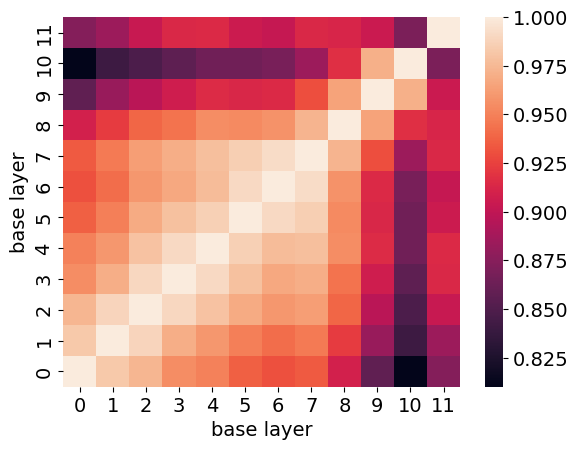

In [5]:
from cross_lingual_subnets.visualization import cka_cross_layer

# Sanity check: is the same model similar to itself?
cka_cross_layer(
    full_sub["en"]["base"],
    full_sub["en"]["base"],
    xlabel="base",
    ylabel="base",
)

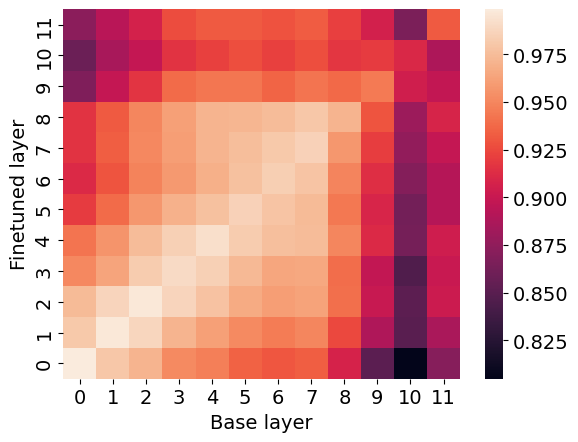

In [6]:
cka_cross_layer(
    full_sub["en"]["base"],
    full_sub["en"]["finetuned"],
    xlabel="Base",
    ylabel="Finetuned",
    savename="cka_base_vs_finetuned.pdf",
)

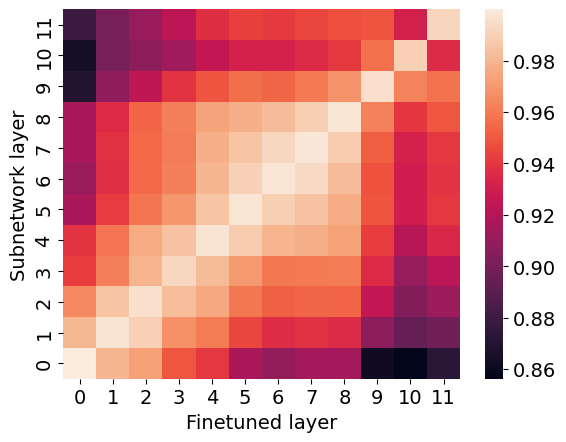

In [7]:
cka_cross_layer(
    full_sub["en"]["finetuned"],
    full_sub["en"]["sub"],
    xlabel="Finetuned",
    ylabel="Subnetwork",
    savename="cka_en_full_vs_sub.pdf",
)

## Heatmaps of representations base vs finetuned models for different languages

/home/paulius/personal/pycharm-projects/cross-lingual-subnetworks/cross_lingual_subnets/visualization.py:172: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


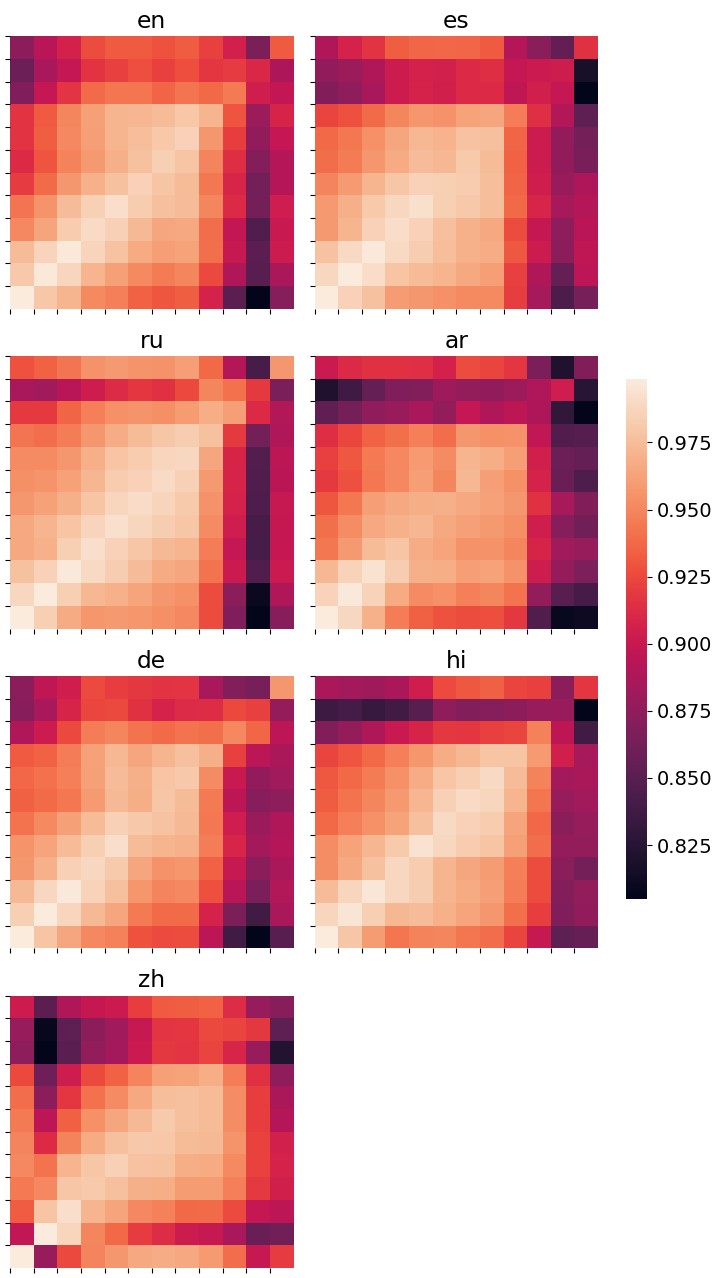

In [23]:
from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

# TODO: fix indices not shown for seaborn heatmaps
df = cka_cross_layer_all_languages(
    full_sub=full_sub,
    xlabel="Base",
    ylabel="Finetuned",
    exp_name1="base",
    exp_name2="finetuned",
    savename="cka_base_vs_finetuned_all_langs.pdf",
    figsize=(7, 13),
)

In [21]:
list(df.index)

[11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

KeyboardInterrupt: 

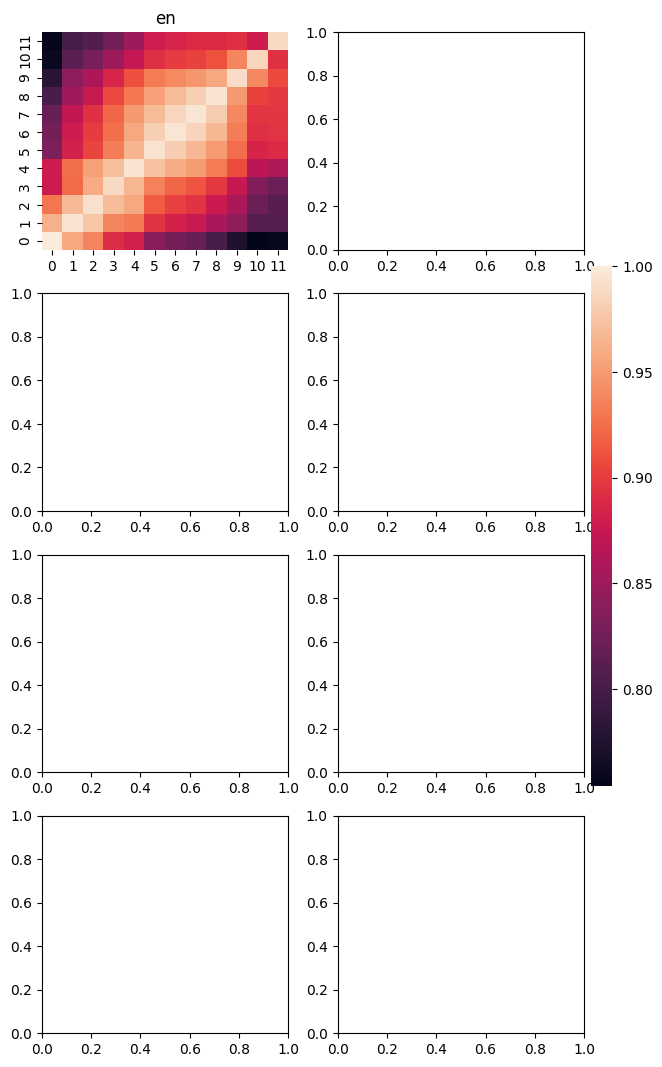

In [ ]:
from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

cka_cross_layer_all_languages(
    full_sub=full_sub,
    xlabel="Full",
    ylabel="Subnetwork",
    exp_name1="full",
    exp_name2="sub",
    savename="cka_full_vs_sub_all_langs.pdf",
)

In [ ]:
cka_cross_layer_all_languages(
    full_sub=full_sub,
    xlabel="Full",
    ylabel="Subnetwork",
    exp_name1="sub",
    exp_name2="sub",
    savename="cka_sub_vs_sub_all_langs.pdf",
)

## Lineplots for comparing representations of same languages but different models per layers

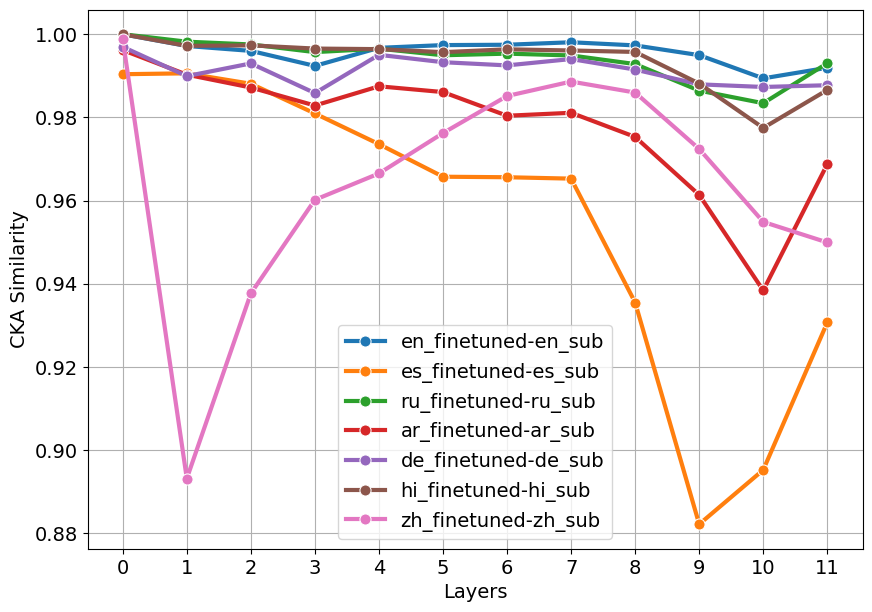

In [ ]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

cka_layer_by_layer(
    full_sub=full_sub,
    exp1="finetuned",
    exp2="sub",
    source=None,
    savename="cka_full_vs_sub_same_langs.pdf",
    legend=True,
    # title="Full vs subnetwork similarity over layers",
    figsize=(11, 6),
)

## Similarity scores over layers for different languages

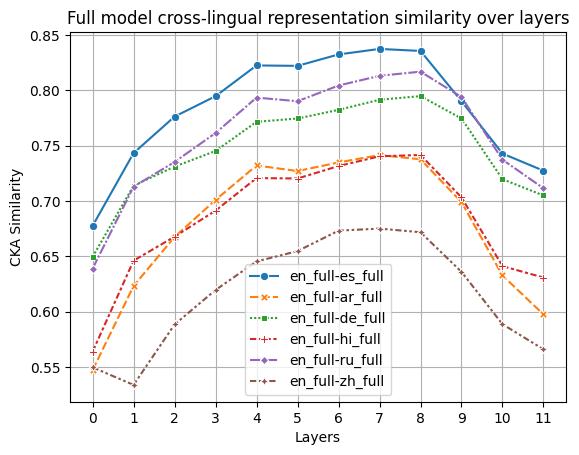

In [ ]:
from cross_lingual_subnets.visualization import cka_layer_by_layer_langs

full_full_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp1="finetuned",
    exp2="finetuned",
    source="en",
    savename="cka_en_other_langs_full_vs_full.pdf",
    legend=True,
    title="Full model cross-lingual representation similarity over layers",
    figsize=(11, 6),
)

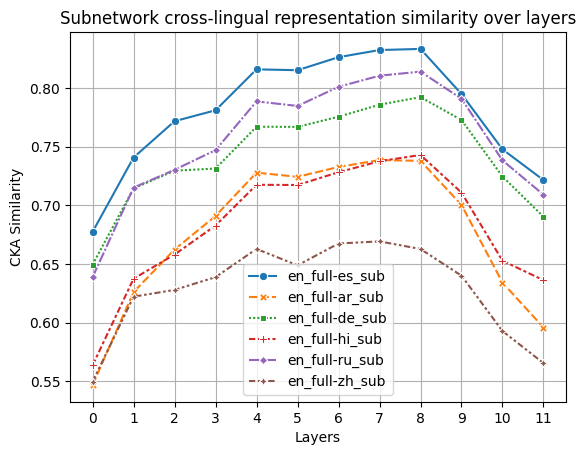

In [ ]:
full_sub_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp1="finetuned",
    exp2="sub",
    source="en",
    savename="cka_en_other_langs_full_vs_sub.pdf",
    legend=True,
    title="Subnetwork cross-lingual representation similarity over layers",
    figsize=(11, 6),
)

In [ ]:
sub_sub_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp1="sub",
    exp2="sub",
    source="en",
    savename="cka_en_sub_other_langs_sub.pdf",
    legend=True,
    title="Subnetwork cross-lingual representation similarity over layers",
    figsize=(11, 6),
)

NameError: name 'cka_layer_by_layer_langs' is not defined

## Barplots of differences of similarity

In [ ]:
diff_df = (full_full_df.to_numpy() - full_sub_df.to_numpy()).T

new_df = pd.DataFrame()
for i, col in enumerate(full_sub_df):
    new_df[col] = diff_df[i]

new_df.T

[2024-05-23 14:48:40,891] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-23 14:48:40,900] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-23 14:48:40,946] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-23 14:48:40,950] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to

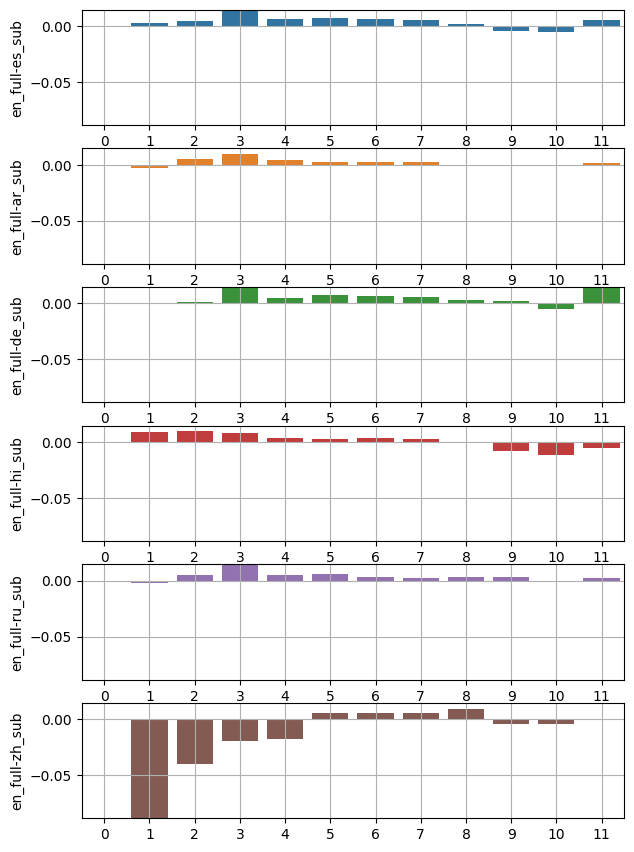

In [ ]:
from cross_lingual_subnets.visualization import cka_diff_barplots

cka_diff_barplots(new_df.T, savename="cka_full_sub_difference_barplots.pdf")

In [ ]:
diff_df = (full_full_df.to_numpy() - sub_sub_df.to_numpy()).T

new_df = pd.DataFrame()
for i, col in enumerate(full_sub_df):
    new_df[col] = diff_df[i]

new_df.T

In [ ]:
cka_diff_barplots(new_df.T, savename="cka_sub_difference_barplots.pdf")